In [5]:
#calculate average confidence score

import os

# Set the path to the directory containing the YOLO detection label files
dir_path = 'path/to/yolo_label'

# Create an empty dictionary to store the total confidence scores and counts for each class
class_totals = {}

# Loop through each file in the directory
for filename in os.listdir(dir_path):
    if filename.endswith('.txt'):
        # Read the contents of the file
        with open(os.path.join(dir_path, filename), 'r') as f:
            lines = f.readlines()

        # Loop through each line and update the class_totals dictionary
        for line in lines:
            parts = line.strip().split()
            class_num = int(parts[0])
            confidence = float(parts[-1])
            if class_num not in class_totals:
                class_totals[class_num] = {'total': 0, 'count': 0}
            class_totals[class_num]['total'] += confidence
            class_totals[class_num]['count'] += 1

# Calculate the average confidence score for each class and print the results
for class_num, totals in class_totals.items():
    avg_confidence = totals['total'] / totals['count']
    print(f'Class {class_num}: {avg_confidence:.4f}')


Class 0: 0.8518
Class 1: 0.8134
Class 3: 0.8569
Class 2: 0.8322


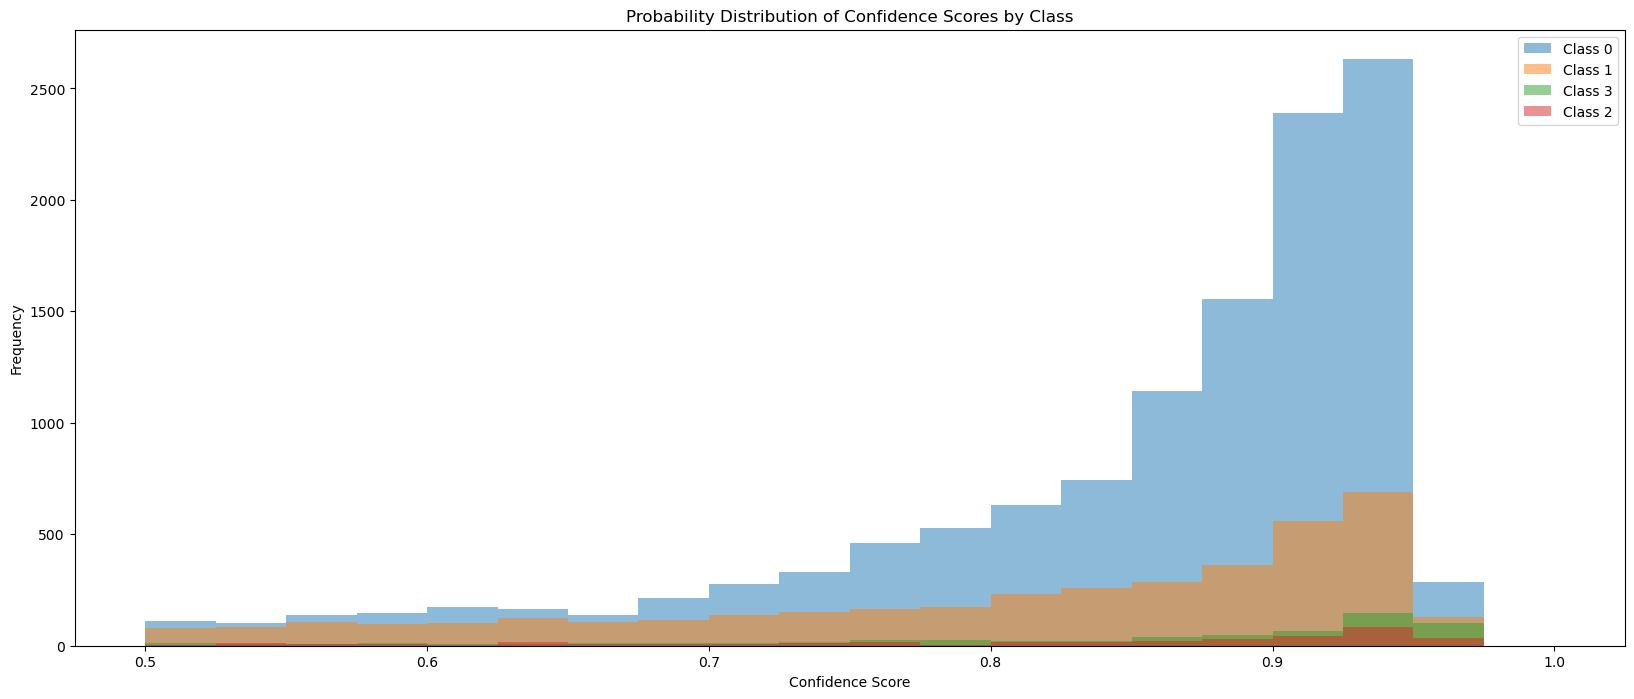

In [12]:
#calculate probability distribution with histogram
import os
import matplotlib.pyplot as plt

# Set the path to the directory containing the YOLO detection label files
dir_path = 'path/to/yolo_label'

# Create an empty dictionary to store the confidence scores for each class
class_scores = {}

# Loop through each file in the directory
for filename in os.listdir(dir_path):
    if filename.endswith('.txt'):
        # Read the contents of the file
        with open(os.path.join(dir_path, filename), 'r') as f:
            lines = f.readlines()

        # Loop through each line and update the class_scores dictionary
        for line in lines:
            parts = line.strip().split()
            class_num = int(parts[0])
            confidence = float(parts[-1])
            if class_num not in class_scores:
                class_scores[class_num] = []
            class_scores[class_num].append(confidence)

fig = plt.subplots(figsize=(20, 8))

# Create a histogram of the confidence scores for each class
for class_num, scores in class_scores.items():
    plt.hist(scores, bins=20, range=(0.5, 1), alpha=0.5, label=f'Class {class_num}')

# Add labels and legend to the plot
plt.xlabel('Confidence Score')
plt.ylabel('Frequency')
plt.title('Probability Distribution of Confidence Scores by Class')
plt.legend()

# Show the plot
plt.show()

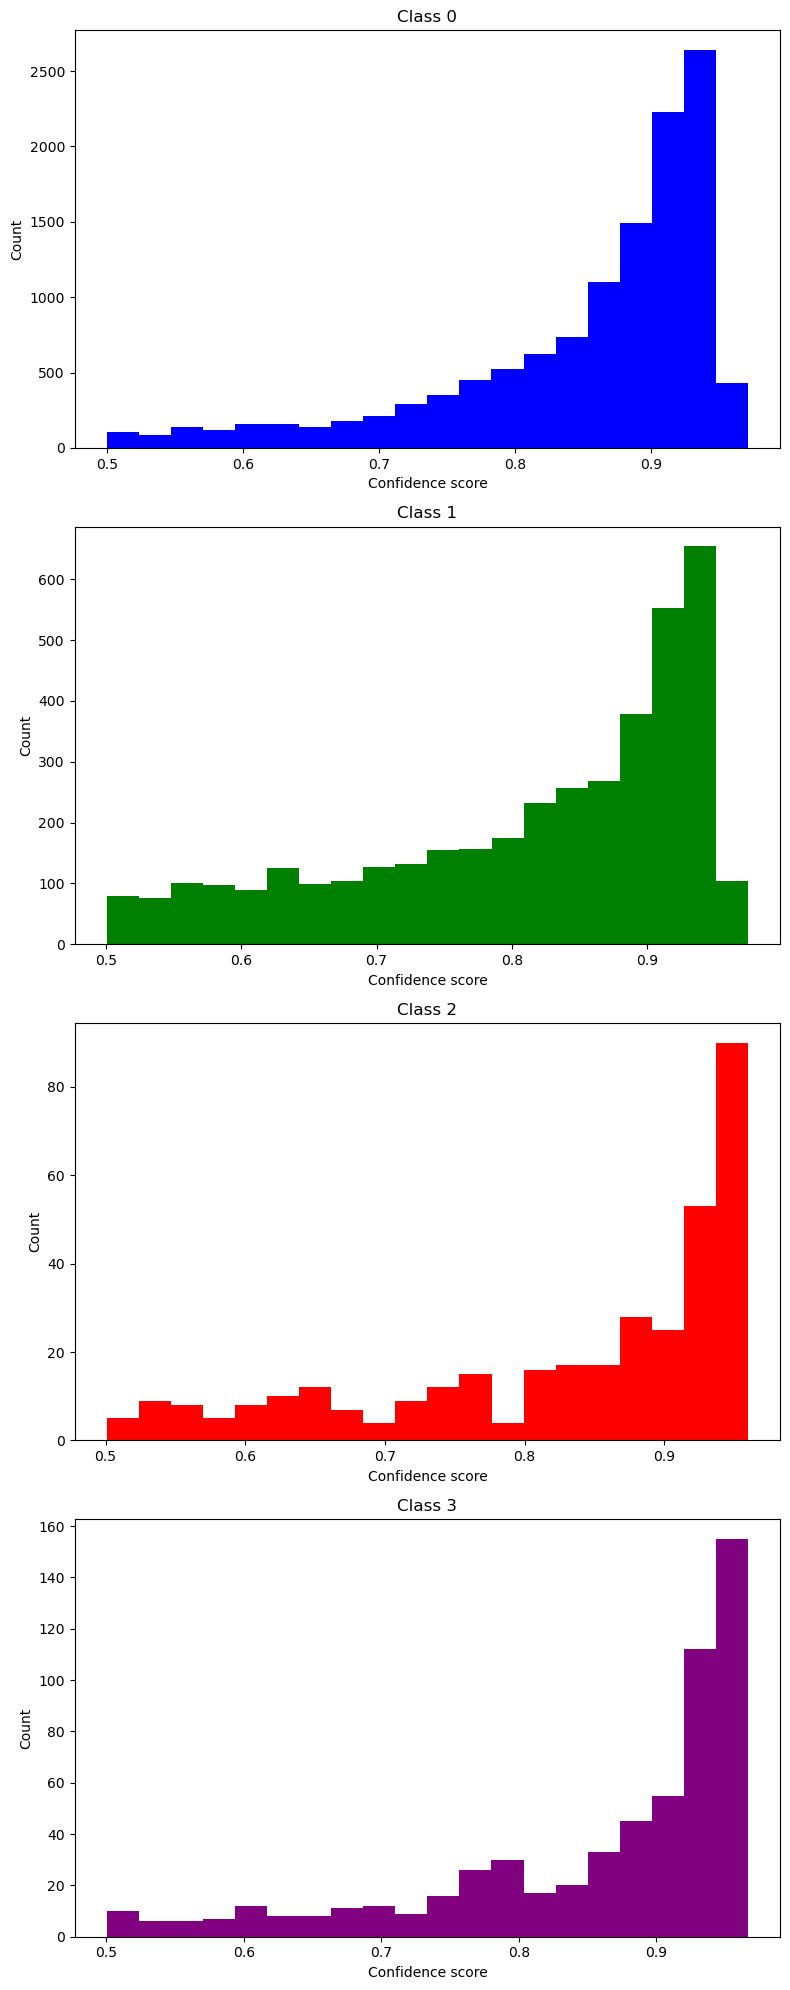

In [13]:
import os
import matplotlib.pyplot as plt

# Set the path to the directory containing the YOLO detection label files
dir_path = 'path/to/yolo_label'

# Create an empty dictionary to store the confidence scores for each class
class_scores = {}

# Loop through each file in the directory
for filename in os.listdir(dir_path):
    if filename.endswith('.txt'):
        # Read the contents of the file
        with open(os.path.join(dir_path, filename), 'r') as f:
            lines = f.readlines()

        # Loop through each line and update the class_scores dictionary
        for line in lines:
            parts = line.strip().split()
            class_num = int(parts[0])
            confidence = float(parts[-1])
            if class_num not in class_scores:
                class_scores[class_num] = []
            class_scores[class_num].append(confidence)

# Sort the class_scores dictionary by class number
class_scores = dict(sorted(class_scores.items()))

# Set the colors for each class histogram
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Plot a separate histogram for each class
fig, axs = plt.subplots(len(class_scores), figsize=(8, 20))

for i, (class_num, scores) in enumerate(class_scores.items()):
    axs[i].hist(scores, bins=20, color=colors[i % len(colors)])
    axs[i].set_xlabel('Confidence score')
    axs[i].set_ylabel('Count')
    axs[i].set_title(f'Class {class_num}')

plt.tight_layout()  # Align the subplots
plt.show()